In [4]:
#general imports
import numpy as np
from os import listdir
from os.path import isfile, join
import matplotlib.pyplot as plt

#specific imports
import openslide

In [5]:
tumors_folder = "/media/nico/data/fourthbrain/project/CAMELYON16/training/tumor/"
annotations_folder = "/media/nico/data/fourthbrain/project/camelyon16/training/annotations/"

In [6]:
origin_filepaths = [join(tumors_folder, f) for f in listdir(tumors_folder) if isfile(join(tumors_folder, f))]

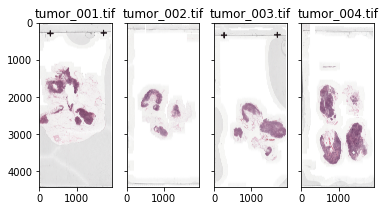

In [7]:

f, axarr = plt.subplots(1,4,sharey=True)
i=0
for path in origin_filepaths[0:4]:
  slide = openslide.OpenSlide(path)
  axarr[i].imshow(slide.get_thumbnail(np.array(slide.dimensions)//50))
  axarr[i].set_title(path.split('/')[-1])
  i+=1
display()

In [20]:
import xml.etree.ElementTree as xml
from collections import namedtuple

Point = namedtuple('Point', 'x y')
_RawAnnotation = namedtuple('RawAnnotation', 'name type_ part_of_group color polygon')


def get_tumor_annotations(filename):

    tree = xml.parse(filename)
    root = tree.getroot()
    annotations = list()

    for annotation in root.iter('Annotation'):
        polygon = (Point(float(c.attrib['X']), float(c.attrib['Y'])) for c in
                   sorted(annotation.iter('Coordinate'),
                          key=lambda x: int(x.attrib['Order'])))

        annotations.append(_RawAnnotation(
            annotation.attrib['Name'].replace(' ', ''),
            annotation.attrib['Type'],
            annotation.attrib['PartOfGroup'],
            annotation.attrib['Color'],
            tuple(polygon)
        ))

    return tuple(annotations)



In [21]:
p = join(annotations_folder, 'tumor_001.xml')

In [22]:
get_tumor_annotations(p)

(RawAnnotation(name='_0', type_='Polygon', part_of_group='_0', color='#F4FA58', polygon=(Point(x=71924.4, y=131761.0), Point(x=71918.7, y=131761.0), Point(x=71918.7, y=131767.0), Point(x=71901.6, y=131801.0), Point(x=71901.6, y=131807.0), Point(x=71890.3, y=131812.0), Point(x=71890.3, y=131818.0), Point(x=71890.3, y=131824.0), Point(x=71884.6, y=131829.0), Point(x=71884.6, y=131835.0), Point(x=71867.5, y=131858.0), Point(x=71867.5, y=131863.0), Point(x=71856.1, y=131881.0), Point(x=71850.4, y=131881.0), Point(x=71839.0, y=131898.0), Point(x=71833.3, y=131909.0), Point(x=71827.6, y=131915.0), Point(x=71827.6, y=131920.0), Point(x=71821.9, y=131920.0), Point(x=71821.9, y=131926.0), Point(x=71821.9, y=131932.0), Point(x=71821.9, y=131938.0), Point(x=71821.9, y=131943.0), Point(x=71816.2, y=131943.0), Point(x=71816.2, y=131949.0), Point(x=71810.5, y=131949.0), Point(x=71810.5, y=131955.0), Point(x=71810.5, y=131960.0), Point(x=71804.8, y=131960.0), Point(x=71804.8, y=131972.0), Point(x=717